In [ ]:
##### General ToDo list:

# For select_data() function, add "STAGE/ROUTE" selection
#     Add an ooption to view screening 'STAGE/ROUTE' only as well

#//ToDo: write a function to fliter out only singificant breaches/ significant number of cases pe trust etc

# Select_data() is now redundant with filter_data()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go


In [2]:
from data_wrangling import get_national
from cancer_plotting import prop_breaches_graph

In [4]:
# code example being used - note will need to run the national_data code first 
national_data_link = r'https://www.england.nhs.uk/statistics/wp-content/' \
    + 'uploads/sites/2/2023/12/' \
    + 'CWT-CRS-National-Time-Series-Oct-2009-Oct-2023-with-Revisions.xlsx'

national_data = get_national(national_data_link)
labels = ['Within Standard_28', 'Outside Standard_28', 'Within Standard_31', 'Outside Standard_31'] 
data_to_plot=['Month','Within Standard_28', 'Outside Standard_28', 'Within Standard_31', 'Outside Standard_31']


In [5]:

prop_breaches_graph(data, filters={'start_month':'05-2022',
                              'end_month':'05-2022',
                              'standard':'FDS'}, window_size=2)

NameError: name 'data' is not defined

In [11]:
from data_wrangling import get_provider_data, nhs_code_link, help_with, read_icb_sicb_coding
from data_wrangling import select_months, select_org, select_cancer, select_standard
from data_wrangling import filter_data
from data_wrangling import proportion_breaches


from cancer_plotting import breaches_animated_plot


In [12]:
data = get_provider_data()

In [8]:
select_cancer(data, cancer_type=['whatevs','Unsuspected_breast_ca', 'All_Cancers'])

Error ocurred with value "whatevs", removing it and continuing


,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2022-04-01,28-day FDS,R1K,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,262,255,7
2022-04-01,28-day FDS,R0A,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,382,144,238
2022-04-01,28-day FDS,R0D,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,3,2,1
2022-04-01,28-day FDS,R1F,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,66,63,3
2022-04-01,28-day FDS,RAS,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,81,78,3
...,...,...,...,...,...,...,...,...
2023-03-01,62-day Combined,RWD,urgent_suspected_cancer,surgery,All_Cancers,83,53,30
2023-03-01,62-day Combined,RWP,urgent_suspected_cancer,surgery,All_Cancers,116,70,46
2023-03-01,62-day Combined,RXN,urgent_suspected_cancer,surgery,All_Cancers,73,27,46


In [13]:
select_org(data, ['R0A', 'R0D'])

,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2022-04-01,28-day FDS,R0A,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,382,144,238
2022-04-01,28-day FDS,R0D,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,3,2,1
2022-04-01,28-day FDS,R0A,screening,not_applicable_FDS,Invalid,143,67,76
2022-04-01,28-day FDS,R0D,screening,not_applicable_FDS,Suspected_breast_ca,12,9,3
2022-04-01,28-day FDS,R0D,screening,not_applicable_FDS,Suspected_gynecological_ca,1,0,1
...,...,...,...,...,...,...,...,...
2023-03-01,62-day Combined,R0A,urgent_suspected_cancer,other,All_Cancers,30,17,13
2023-03-01,62-day Combined,R0A,urgent_suspected_cancer,radiotherapy,All_Cancers,10,2,8
2023-03-01,62-day Combined,R0D,urgent_suspected_cancer,radiotherapy,All_Cancers,11,4,7


In [ ]:
#data = proportion_breaches((data))

In [14]:
select_months(data, end_date='2023-10-01')

,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2022-04-01,28-day FDS,R1K,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,262,255,7
2022-04-01,28-day FDS,R0A,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,382,144,238
2022-04-01,28-day FDS,R0D,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,3,2,1
2022-04-01,28-day FDS,R1F,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,66,63,3
2022-04-01,28-day FDS,RAS,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,81,78,3
...,...,...,...,...,...,...,...,...
2023-03-01,62-day Combined,RWD,urgent_suspected_cancer,surgery,All_Cancers,83,53,30
2023-03-01,62-day Combined,RWP,urgent_suspected_cancer,surgery,All_Cancers,116,70,46
2023-03-01,62-day Combined,RXN,urgent_suspected_cancer,surgery,All_Cancers,73,27,46


In [ ]:
help(filter_data)

In [9]:
filter_data(df=data, filters={'start_month':'05-2022',
                              'end_month':'05-2022',
                              'standard':'FDS'})

NameError: name 'filter_data' is not defined

In [ ]:
help(select_standard)

In [ ]:
isinstance(np.empty(shape=2), list)

In [ ]:
help_with('standards')

In [ ]:
data

In [ ]:
link_data = nhs_code_link()
# overlap = list(set(data['ORG CODE']) & set(link_data['ORG CODE']))
# unmatched = data[~data['ORG CODE'].astype(str).isin(link_data['ORG CODE'].astype(str))]

In [ ]:
#plt.figure(figsize=[10,10])
sns.stripplot(x='PERIOD', y = 'BREACHES', data=select_org(df=data,org_str='R1K'), hue = 'CANCER_TYPE', legend=False)

In [ ]:
sns.lineplot(x='PERIOD', y='BREACHES', data=select_org(data,'R0A').groupby(by='PERIOD').sum())

In [ ]:
data.stage_or_route.value_counts()

In [ ]:
# Need to add informative title displaying type of cancer and full name of organisation + national standard on the plot
# Need to handle if some orgs do not have certain cancers/standards

trial = select_data(data,[('cancer',3), ('org', 'r0a'), ('standard', 'FDS')])
trial = trial.loc[trial['STAGE/ROUTE'] =='NATIONAL SCREENING PROGRAMME']
breaches_animated_plot(trial,[])


In [ ]:
######## Below is work in progress on creating a map with statistics

In [289]:
def select_to_plot(data, gdf=None, filters=None, start_month='2022-04-01', end_month='2023-03-01', standard='FDS',
                   stage_or_route=None, treatment=None, cancer_type=None, return_filtered=False):
    """
    Select and filter data for plotting on a map.

    Parameters
    ----------
    data : DataFrame
        The input DataFrame containing the data to be filtered and plotted.
    gdf : GeoDataFrame, optional
        The GeoDataFrame representing the geographical data for mapping. Default is None.
    filters : dict, optional
        A dictionary of filters to apply directly to the data. If provided, other filtering arguments are ignored.
        Default is None.
    start_month : str, optional
        The start month for filtering data. Format should be 'YYYY-MM'. Default is '2022-04-01'.
    end_month : str, optional
        The end month for filtering data. Format should be 'YYYY-MM'. Default is '2023-03-01'.
    standard : str, optional
        The standard for filtering data. Default is 'FDS'.
    stage_or_route : str, optional
        The stage or route for filtering data. Default is None.
    treatment : str, optional
        The treatment modality for filtering data. Default is None.
    cancer_type : str, optional
        The cancer type for filtering data. Default is None.
    return_filtered : bool, optional
        If True, return the filtered DataFrame in addition to the mapped GeoDataFrame and labels.
        Default is False.

    Returns
    -------
    result : tuple
        A tuple containing the mapped GeoDataFrame, labels for plotting, and optionally, the filtered DataFrame.

    Notes
    -----
    - If filters is provided, other filtering arguments are ignored.
    - The function calculates proportions of breaches for each ICB23NM category.
    - The GeoDataFrame is merged with the proportions of breaches based on ICB23NM.

    Examples
    --------
    >>> select_to_plot(data, gdf, start_month='2022-04-01', end_month='2023-03-01', standard='FDS')
    (<GeoDataFrame>, {'cancer_type': array([...]), 'period': array([...]), 'standard': array([...])})

    >>> select_to_plot(data, gdf, filters={'start_month': '2022-06-01', 'cancer_type': 'Breast'},
    ...                return_filtered=True)
    (<GeoDataFrame>, {'cancer_type': array([...]), 'period': array([...]), 'standard': array([...])},
    <DataFrame>)
    """
    if filters is None:
        # Create a dictionary with all arguments
        args_dict = locals()
        keywords = {'start_month', 'end_month', 'standard', 'stage_or_route', 'treatment', 'cancer_type'}
        filter_dict = {key: value for key, value in args_dict.items() if key in keywords and value is not None}
    elif filters is not None:
        filter_dict = filters

    filtered_df = filter_data(data, filter_dict)

    icb_code_to_names, org_to_hlhg = create_lookup_dict_icb()

    filtered_df['hlhg'] = filtered_df['org_code'].map(org_to_hlhg)
    filtered_df['ICB23NM'] = filtered_df['hlhg'].map(icb_code_to_names)

    labels_for_plotting = {'cancer_type': filtered_df.cancer_type.unique(),
                           'period': filtered_df.index.unique(),
                           'standard': filtered_df.standard.unique()}

    icb_breaches = round(filtered_df.groupby('ICB23NM').breaches.sum()
                         / filtered_df.groupby('ICB23NM').total.sum(), 2
                        ).astype(float)

    icb_breaches.rename('proportion_breaches', inplace=True)

    gdf = read_shapefile()

    merged_gdf = pd.merge(gdf, icb_breaches, left_on='ICB23NM', right_index=True)

    if not return_filtered:
        return merged_gdf, labels_for_plotting
    elif return_filtered:
        return merged_gdf, labels_for_plotting, filtered_df

    
    
    
    

In [327]:
data

,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches,hlhg,ICB23NM
month,,,,,,,,,,
2022-04-01,28-day FDS,R1K,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,262,255,7,QRV,NHS North West London Integrated Care Board
2022-04-01,28-day FDS,R0A,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,382,144,238,QOP,NHS Greater Manchester Integrated Care Board
2022-04-01,28-day FDS,R0D,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,3,2,1,QVV,NHS Dorset Integrated Care Board
2022-04-01,28-day FDS,R1F,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,66,63,3,QRL,NHS Hampshire and Isle of Wight Integrated Car...
2022-04-01,28-day FDS,RAS,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,81,78,3,QRV,NHS North West London Integrated Care Board
...,...,...,...,...,...,...,...,...,...,...
2023-03-01,62-day Combined,RWD,urgent_suspected_cancer,surgery,All_Cancers,83,53,30,QJM,NHS Lincolnshire Integrated Care Board
2023-03-01,62-day Combined,RWP,urgent_suspected_cancer,surgery,All_Cancers,116,70,46,QGH,NHS Herefordshire and Worcestershire Integrate...
2023-03-01,62-day Combined,RXN,urgent_suspected_cancer,surgery,All_Cancers,73,27,46,QE1,NHS Lancashire and South Cumbria Integrated Ca...


In [ ]:
filter_data()

In [333]:
data.treatment_modality.unique()

['not_applicable_FDS', 'all', 'anticancer_drug', 'other', 'radiotherapy', 'surgery']
Categories (6, object): ['all', 'anticancer_drug', 'other', 'radiotherapy', 'surgery', 'not_applicable_FDS']

In [356]:
x = select_to_plot(data, filters={'start_month':'05-2022',
                              'end_month':'01-2023',
                              'standard':'RTT',
                                  'treatment_modality':['radiotherapy', 'surgery']
                                })

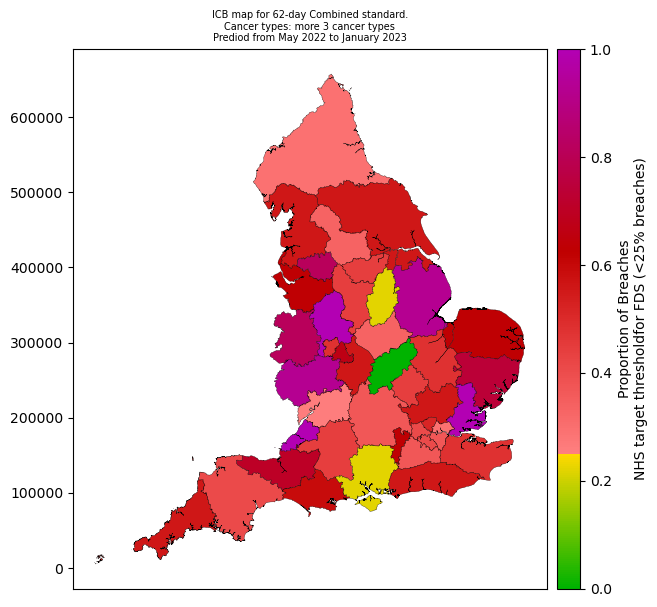

In [360]:
fig,ax = plot_icb_map(data, filters={'start_month':'05-2022',
                              'end_month':'01-2023',
                              'standard':'FDS',
                                })


In [311]:
x[1]['cancer_type']

['Unsuspected_breast_ca']
Categories (28, object): ['All_Cancers', 'Breast', 'Unsuspected_breast_ca', 'Gynecological', ..., 'Suspected_upper_GI_ca', 'Suspected_urological_ca', 'Upper_GI', 'Urological']

In [309]:
x[1]['period'][-1].strftime('%B %Y')

'March 2023'

In [304]:
x[1]['standard'][0]

'28-day FDS'

In [336]:
select_to_plot()

{'cancer_type': ['Breast', 'Hematological', 'Other', 'All_Cancers', 'Gynecological', ..., 'Lower_GI', 'Lung', 'Skin', 'Upper_GI', 'Urological']
 Length: 11
 Categories (28, object): ['All_Cancers', 'Breast', 'Unsuspected_breast_ca', 'Gynecological', ..., 'Suspected_upper_GI_ca', 'Suspected_urological_ca', 'Upper_GI', 'Urological'],
 'period': DatetimeIndex(['2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
                '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
                '2023-01-01'],
               dtype='datetime64[ns]', name='month', freq=None),
 'standard': ['62-day Combined']
 Categories (3, object): ['28-day FDS', '31-day Combined', '62-day Combined']}

In [340]:
format_map_label(x[1])

ICB map for 62-day Combined standard.
Cancer types: more 3 cancer types
Prediod from May 2022 to January 2023


In [320]:
c=x[1]['cancer_type'][0]


In [323]:
c.

'Unsuspected breast ca'

In [237]:
help_with('standards')

There are three standards present in this dataset:
 1. The 28-day Faster Diagnosis Standard (FDS).
The standard: People should have cancer ruled out or receive a diagnosis within 28 days
NHS target: 75% of people should meet this standard

 2. 31-day decision to treat to treatment standard (DTT).
The standard: Treatment should begin within a month (31 days)of deciding to treat their cancer.
NHS target: 96% of people should meet this standard

 3.62-day referral to treatment standard
The standard: Treatment should begin withintwo months (62 days) of an urgent referral.
NHS target: 85% of people should meet this standard

 
 Further info at:  https://news.cancerresearchuk.org/2023/08/17/breaking-down-nhs-englands-changes-in-standards-for-cancer-care/


In [ ]:
filters

'28-day FDS'

In [236]:
filters={'start_month':'05-2022', 'end_month':'05-2022','standard':'FDS'}

filters['standard']

'FDS'

In [ ]:
data

In [ ]:
help(select_to_plot)

In [ ]:
labels = select_to_plot(data, [('cancer',10), ('standard', 'FDS')])[1]
plotting_material = select_to_plot(data, [('cancer',10), ('standard', 'FDS')])[0]

In [ ]:
labels

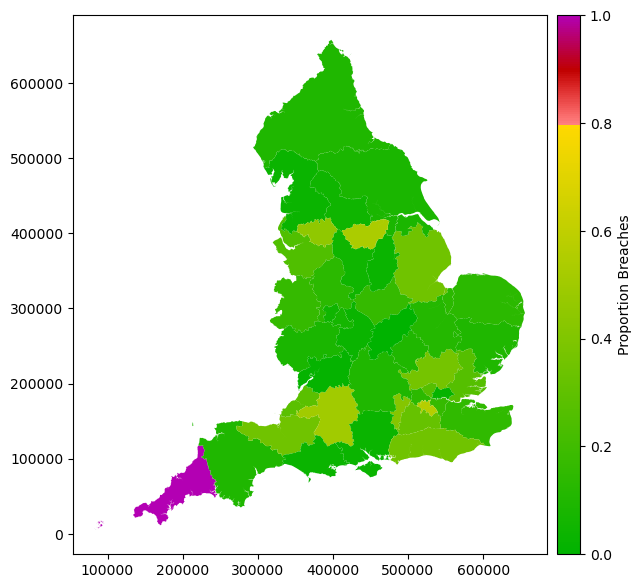

In [235]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize



In [ ]:
icb_codes = read_icb_sicb_coding()
nhs_link = nhs_code_link()

icb_code_to_names = dict(zip(icb_codes['ICB22CDH'], icb_codes['ICB22NM']))
org_to_icb = dict(zip(nhs_link['ORG_CODE'], nhs_link['Higher Level Health Geography']))

data['hhlg'] = data['ORG_CODE'].map(org_to_icb)
data['ICB23NM'] = data['hhlg'].map(icb_code_to_names)

In [ ]:
icb_breaches = round(data.groupby('ICB23NM').BREACHES.sum() / data.groupby('ICB23NM').TOTAL.sum(), 2).astype(float)
icb_breaches.rename('proportion_breaches', inplace=True)

In [ ]:
gdf.head()

In [ ]:
merged_gdf = pd.merge(gdf, icb_breaches, left_on='ICB23NM', right_index=True)
merged_gdf.head()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(column='LAT', ax=ax, legend=True,
                legend_kwds={'label': "Proportion Breaches", 'orientation': "vertical"})

plt.show()

/var/folders/lt/g5gx9ncd40b1hj431tb2zv240000gn/T/ipykernel_23489/3022994242.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


TypeError: colorbar() got multiple values for argument 'mappable'

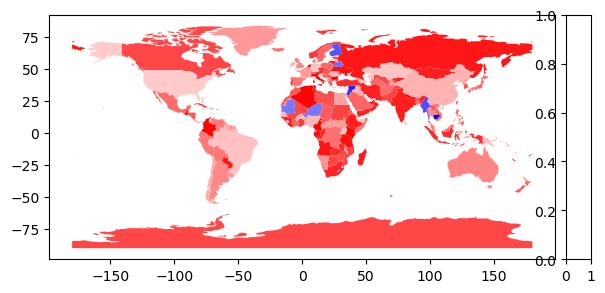

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd

# Define colors for the colormap
colors_below_inflection = [(0.0, 0.0, 1.0), (0.8, 0.8, 1.0)]  # Blue to light blue
colors_above_inflection = [(1.0, 0.8, 0.8), (1.0, 0.0, 0.0)]  # Light red to red

inflection = 0.1

# Calculate the number of colors for each segment
num_colors_below_inflection = int(256 * inflection)
num_colors_above_inflection = 256 - num_colors_below_inflection

# Create the colormap using LinearSegmentedColormap
cmap_below_inflection = LinearSegmentedColormap.from_list('below_inflection', colors_below_inflection, N=num_colors_below_inflection)
cmap_above_inflection = LinearSegmentedColormap.from_list('above_inflection', colors_above_inflection, N=num_colors_above_inflection)

# Combine the colormaps above and below the inflection point
cmap_custom = np.vstack((cmap_below_inflection(np.linspace(0, 1, num_colors_below_inflection)),
                         cmap_above_inflection(np.linspace(0, 1, num_colors_above_inflection))))

# Create a custom colormap with an inflection point at 0.1
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', cmap_custom, N=256)

# Generate some data for plotting
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['proportion_breaches'] = np.random.rand(len(world))

# Plot the GeoDataFrame with the specified colormap
fig, ax = plt.subplots(figsize=(7, 7))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Create a ScalarMappable to anchor the inflection point to a specific value
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=Normalize(vmin=0, vmax=world['proportion_breaches'].max()))

# Plot the GeoDataFrame using the custom colormap
world.plot(column='proportion_breaches', cmap=custom_cmap, ax=ax, legend=True, cax=cax,
           legend_kwds={'label': "Proportion Breaches", 'orientation': "vertical", 'mappable': sm})

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.show()
